In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statistics as stat

In [11]:
df = pd.read_csv('E:\\datascience packages\\multi linear regression\\ToyotaCorolla.csv', encoding='cp1252')


In [12]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]


In [13]:
print('columns name are as follows: ',df.columns)


columns name are as follows:  Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')


In [14]:
df.head()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [15]:
print('basic measure of central despersion, and measure of central despersion: ',df.describe())
print('Variance of every columns: ',df.loc[:,:].var())


basic measure of central despersion, and measure of central despersion:                Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    

IndexError: index 4 is out of bounds for axis 0 with size 4

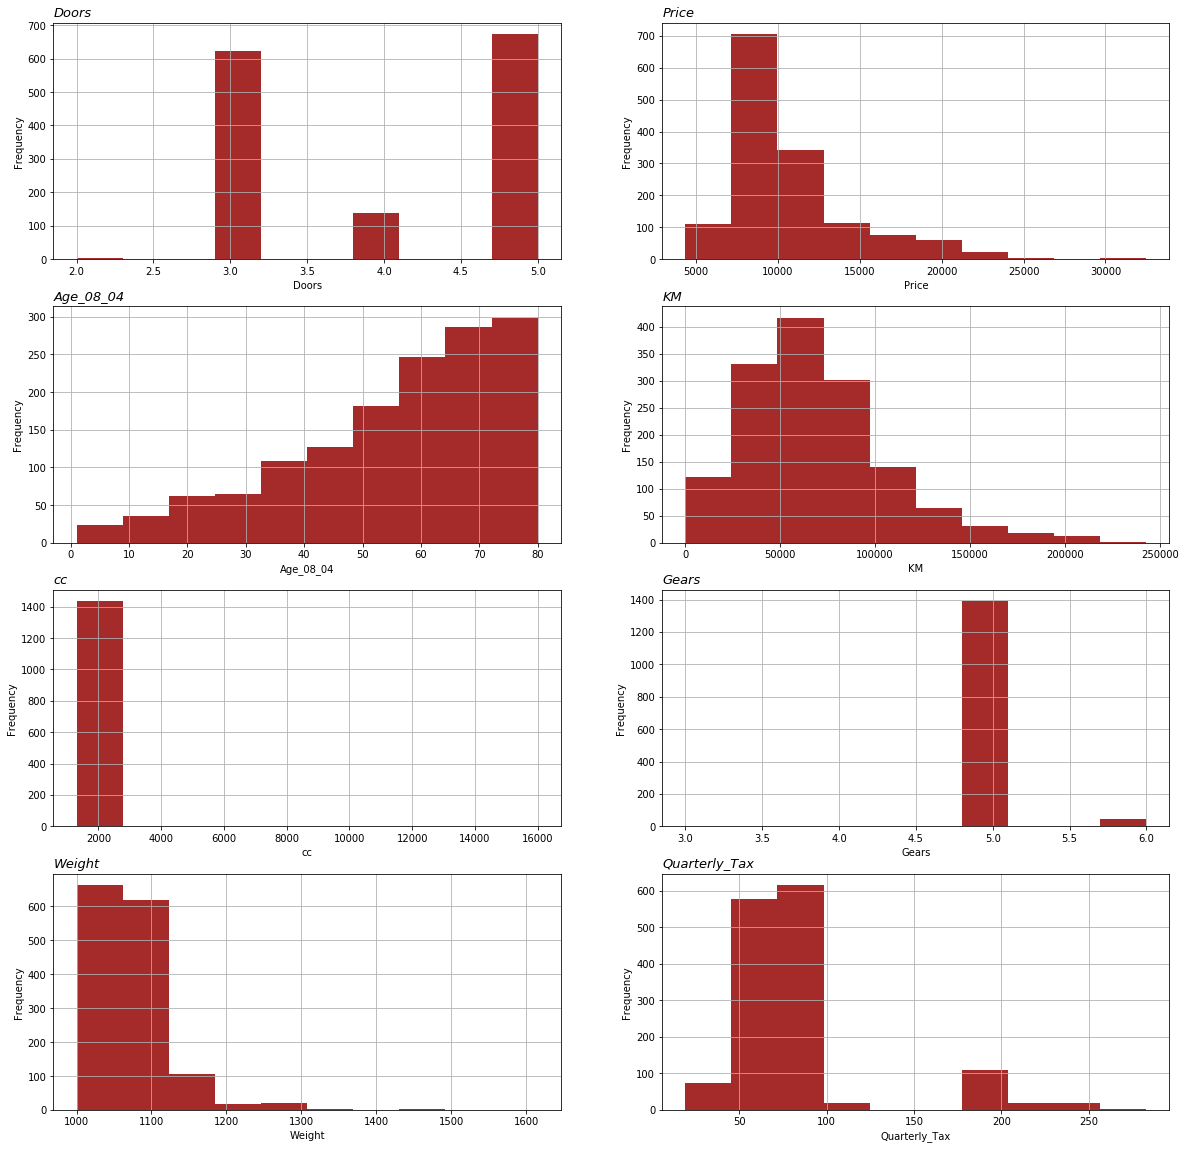

In [16]:
########################## visualization technique #########################################
hist_plot = list(set(df.columns))
i = 0
j = 0
f , axis = plt.subplots(4,2, figsize = (20,20))
for column in hist_plot:
    f = df[column].hist(color = 'brown', ax = axis[i,j])
    axis[i,j].set_title(column, style = 'italic', loc = 'left', fontsize = 13)
    axis[i,j].set_xlabel(column, size = 10)
    axis[i,j].set_ylabel('Frequency', size = 10)
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

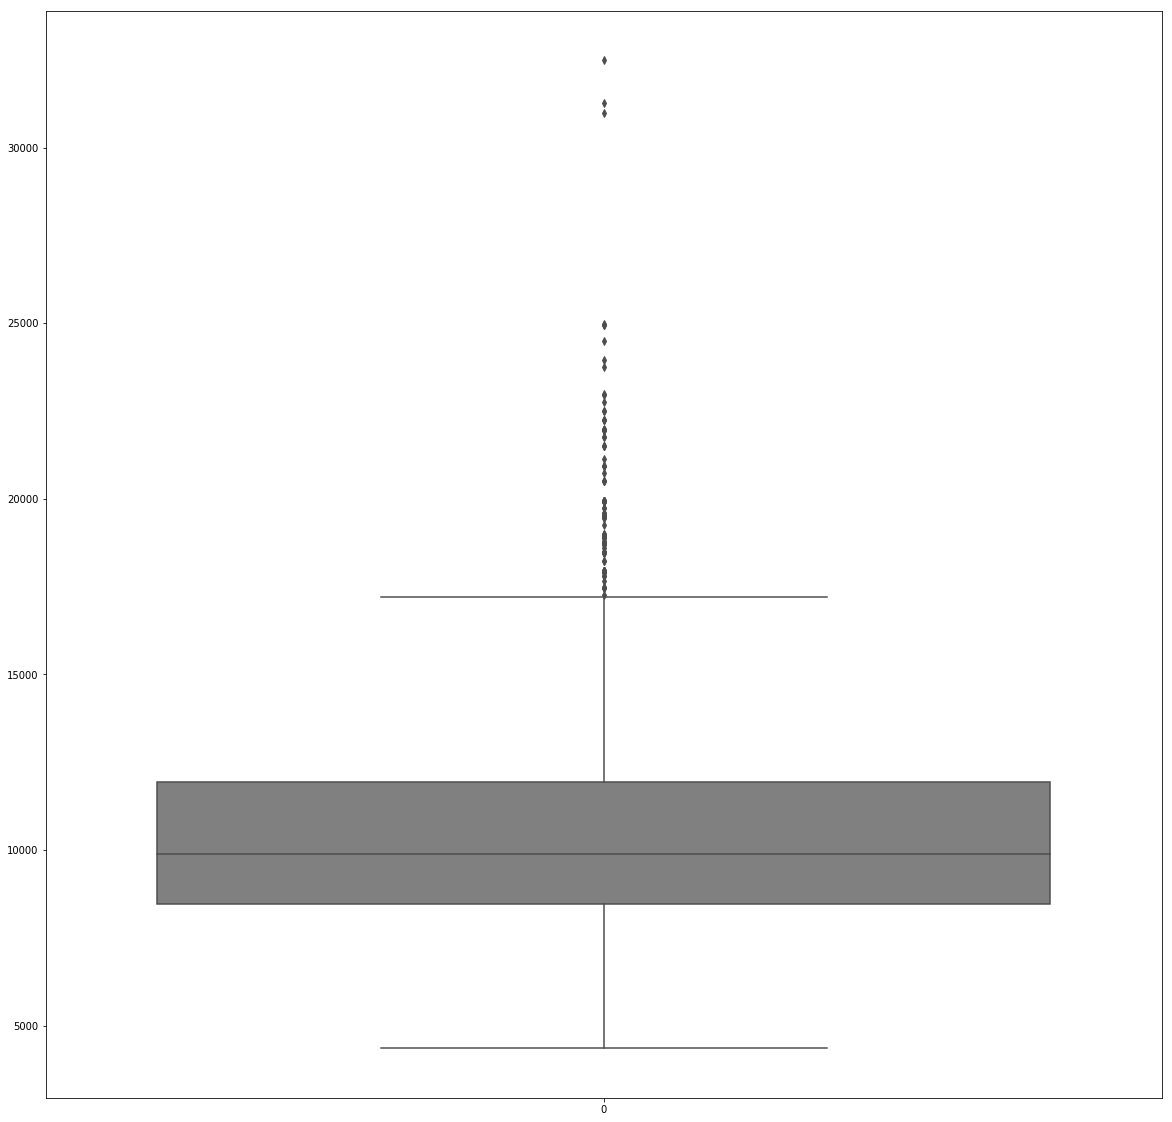

In [17]:
#---------------------- boxplot
fi , axes = plt.subplots(figsize = (20,20))        
fi = sns.boxplot(data = df['Price'], ax = axes, color = 'grey')


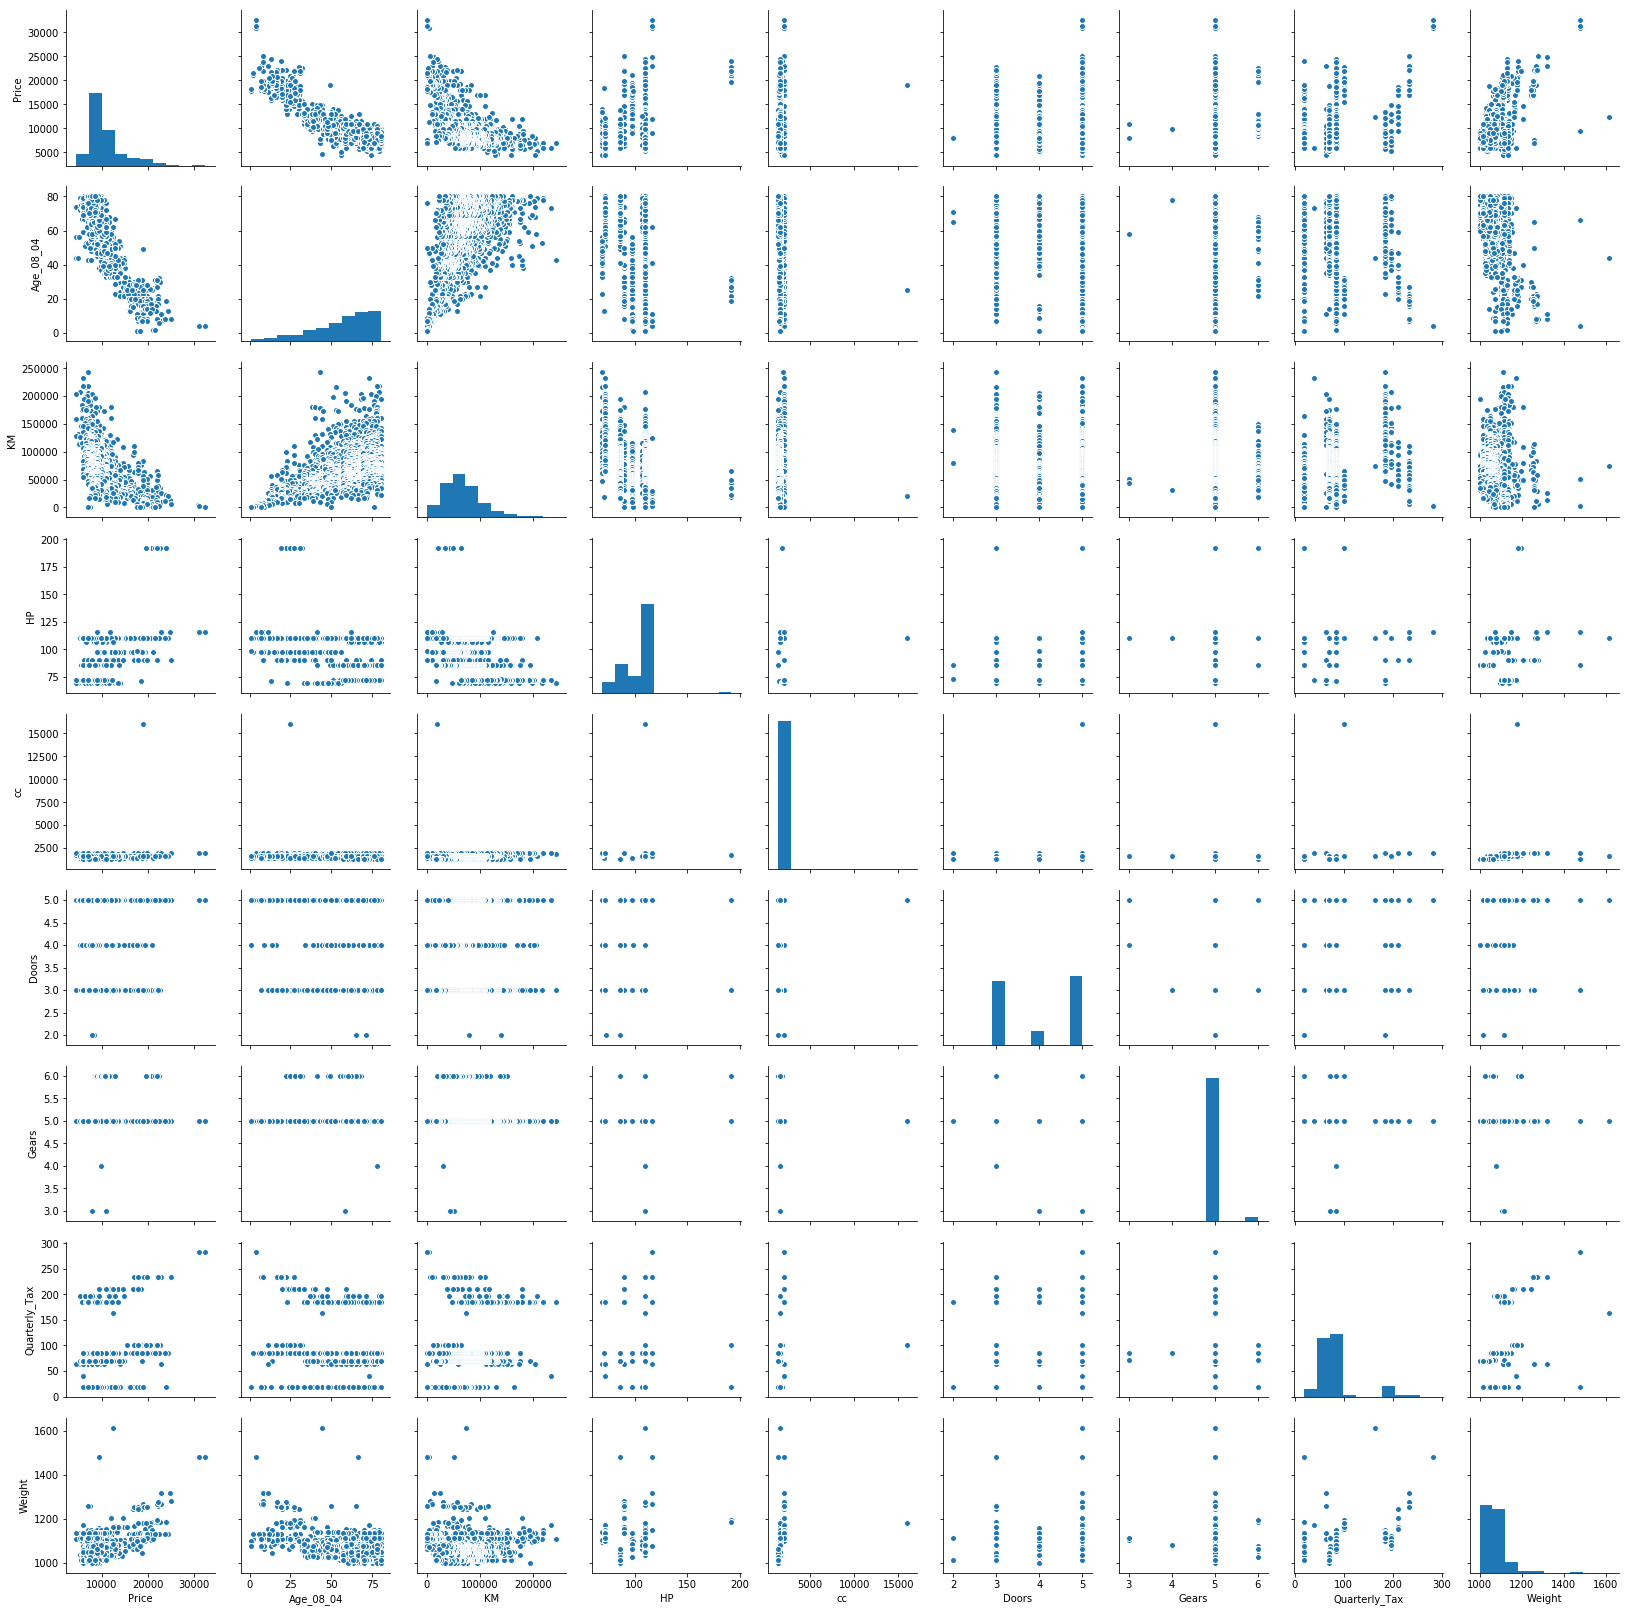

In [18]:
#---------------------- scatter plot
sns.pairplot(df)

Text(0.5,1,' correlation of ToyotaCorolla')

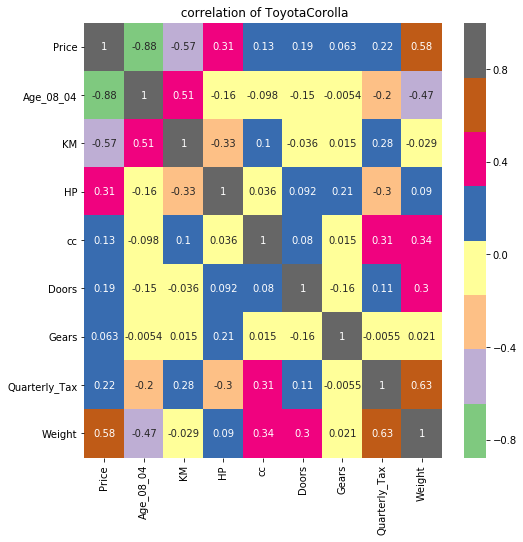

In [19]:
#----------------------- corelation using heatmap
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, cmap='Accent')
plt.title(' correlation of ToyotaCorolla')


In [20]:
############################## building model for toyotacorolla ##############################################

import statsmodels.formula.api as smf

In [21]:
first_model = smf.ols("Price ~ Age_08_04 +KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data = df).fit()


In [23]:
first_model.summary()
# p-value of cc = 0.179 and Doors = 0.968 which is greater than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:36:02   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# transformation
df['log_cc'] = np.log(df['cc'])

In [25]:
df['mean_doors'] = np.mean(df['Doors'])

In [26]:
new_df = df.drop(['cc','Doors'], axis = 1)

In [27]:
# new model with transformed data to improve p-value adjusted
second_model = smf.ols('Price ~ Age_08_04 +KM + HP + log_cc + mean_doors + Gears + Quarterly_Tax + Weight', data = new_df).fit()


In [28]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1330.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:36:52   Log-Likelihood:                -12358.
No. Observations:                1436   AIC:                         2.473e+04
Df Residuals:                    1428   BIC:                         2.477e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       479.9451    154.131      3.114      0.002     177.597     782.293
Age_08_04      -121.1425      2.585    -46.868      0.000    -126.213    -116.072
KM               -0.0193      0.001    -15.262      0.000      -0.022      -0.017
HP               36.7653      2.907     12.649      0.000      31.064      42.467
log_cc        -2260.5811    372.603     -6.067      0.000   -2991.490   -1529.673
mean_doors     1935.8230    621.677      3.114      0.002     716.325    3155.321
Gears           558.1799    191.180      2.920      0.004     183.156     933.204
Quarterly_Tax     6.5452      1.361      4.808      0.000       3.875       9.216
Weight           18.6978      1.059     17.658      0.000      16.621      20.775
==============================================================================
Omnibus:                      193.404   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1796.315
Skew:                          -0.270   Prob(JB):                         0.00
Kurtosis:                       8.453   Cond. No.                     2.37e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
import statsmodels.api as sm


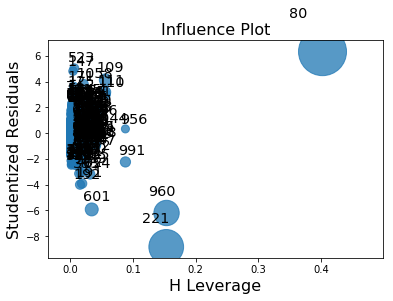

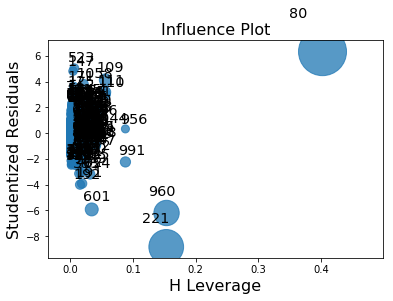

In [30]:
sm.graphics.influence_plot(second_model)


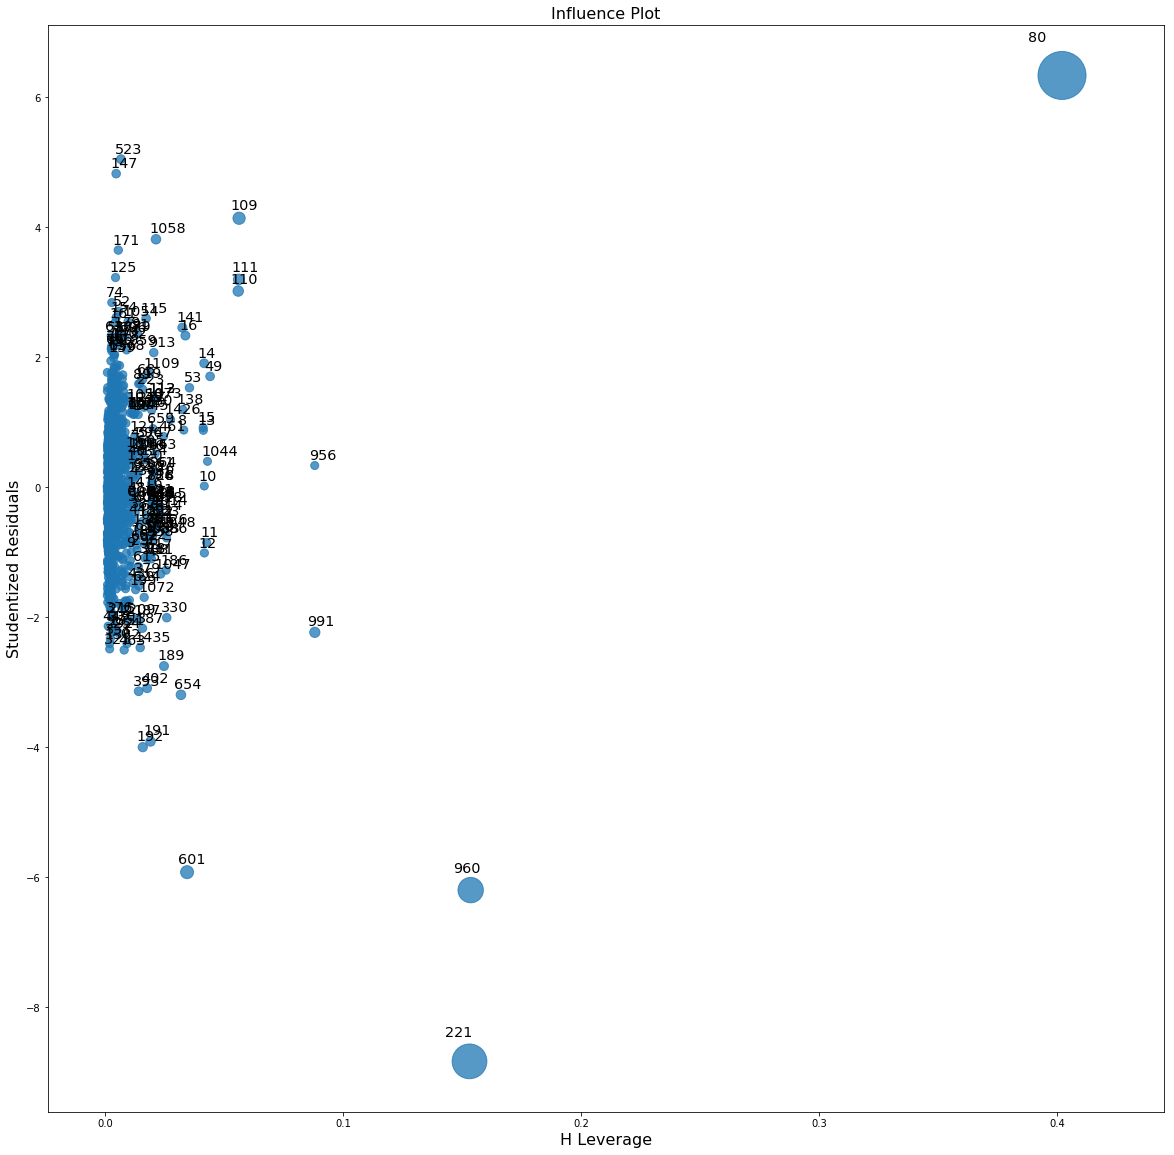

In [32]:
fi , axes = plt.subplots(figsize=(20,20))
fi = sm.graphics.influence_plot(second_model, ax = axes)

In [33]:
drop_df = new_df.drop(new_df.index[[80,221,960,601,991,109,192,191,110,111,109,1058,523,147,601,654,402]] )


In [34]:
final_model = smf.ols('Price ~ Age_08_04 +KM + HP + log_cc + mean_doors + Gears + Quarterly_Tax + Weight', data = drop_df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1656.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:39:25   Log-Likelihood:                -12023.
No. Observations:                1421   AIC:                         2.406e+04
Df Residuals:                    1413   BIC:                         2.410e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1022.1843    170.375      6.000      0.000     687.969    1356.400
Age_08_04      -111.9946      2.368    -47.301      0.000    -116.639    -107.350
KM               -0.0172      0.001    -15.262      0.000      -0.019      -0.015
HP               33.4085      2.710     12.328      0.000      28.093      38.724
log_cc        -5116.7047    451.584    -11.331      0.000   -6002.551   -4230.858
mean_doors     4122.9048    687.196      6.000      0.000    2774.871    5470.938
Gears           472.7353    173.139      2.730      0.006     133.098     812.373
Quarterly_Tax     2.1476      1.341      1.602      0.109      -0.482       4.778
Weight           30.0265      1.266     23.712      0.000      27.542      32.511
==============================================================================
Omnibus:                       15.622   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.980
Skew:                           0.130   Prob(JB):                     2.78e-05
Kurtosis:                       3.535   Cond. No.                     3.59e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.72e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

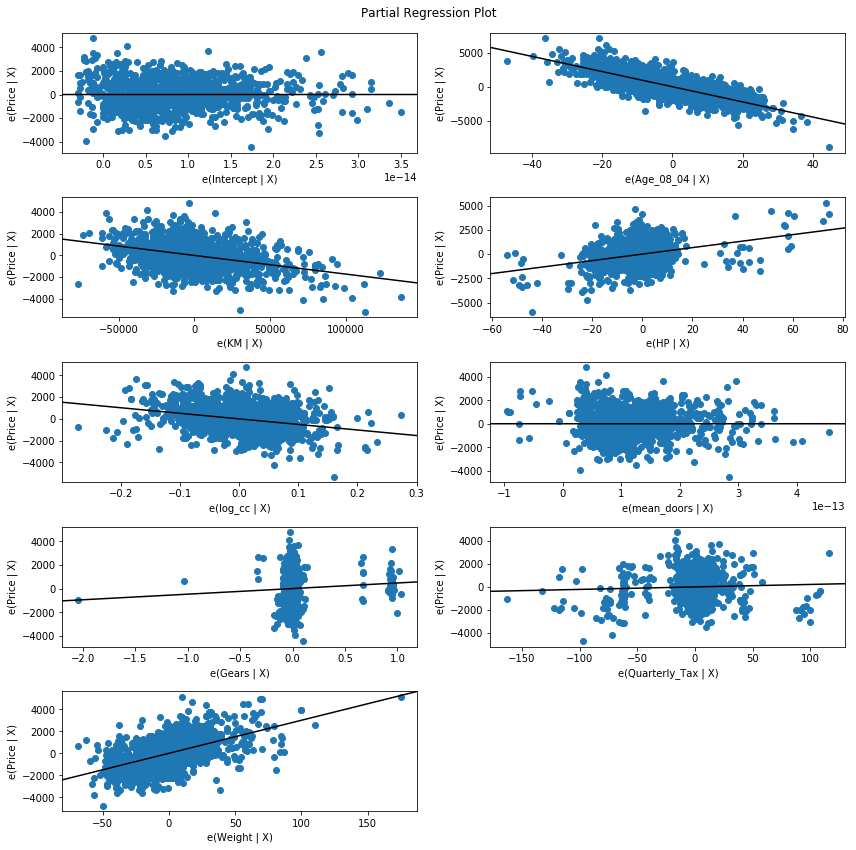

In [35]:
####################### partial regression plot #####################
fig = plt.figure(figsize = (12,12))
fig = sm.graphics.plot_partregress_grid(final_model, fig= fig)


In [36]:
predic_price = final_model.predict(drop_df[['Age_08_04','KM','HP','log_cc','mean_doors','Gears','Quarterly_Tax','Weight']])
predic_price

0       16179.543807
1       15733.868268
2       16158.140670
3       15826.145909
4       15691.450547
5       15081.052404
6       17315.769113
7       17301.329178
8       20511.234435
9       13470.358601
10      21005.978572
11      21133.318626
12      20993.476095
13      20479.318058
14      20176.162661
15      20888.479067
16      19929.666323
17      16241.424772
18      14832.558579
19      14837.117818
20      14780.427326
21      17284.319670
22      15649.066038
23      16063.451037
24      16061.488565
25      16464.179743
26      16135.516686
27      15793.543986
28      15858.705794
29      16202.342855
            ...     
1406     9006.558731
1407     9903.988874
1408     7893.585488
1409     9100.883068
1410     6890.991306
1411     8992.117151
1412     9153.759461
1413    10037.541751
1414     7932.363777
1415     8831.514714
1416     9894.620847
1417     8920.265194
1418     7977.853466
1419     8547.996734
1420     9262.379901
1421     8373.081893
1422     8262

In [37]:
residual = pd.DataFrame(pd.Series(drop_df['Price'])- predic_price)
residual.mean()

0    1.594907e-09
dtype: float64

In [38]:
stdresidual = pd.DataFrame(final_model.resid_pearson)
stdresidual.mean()

0    1.390837e-12
dtype: float64

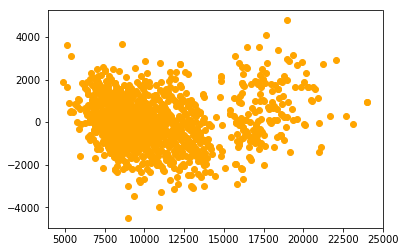

In [39]:
plt.scatter(predic_price,residual, color = 'orange')

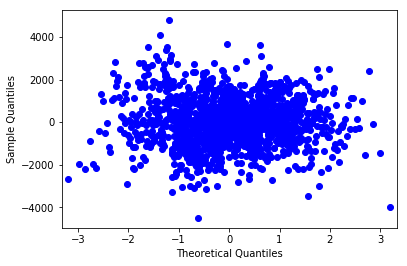

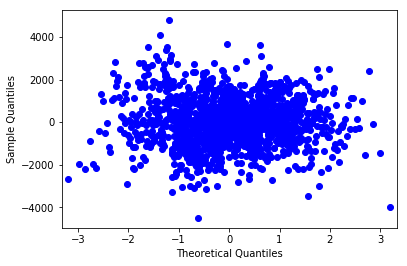

In [40]:
sm.qqplot(residual)